In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


# Data Preprocessing

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [7]:
import matplotlib.pyplot as plt
from IPython.display import HTML

In [8]:
IMAGE_SIZE=256 #each side
BATCH_SIZE=32 #A standard batch size
CHANNELS=3 #RGB color channel
EPOCHS=50

In [9]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset) #68*32 that means 68 of batches of 32

68

In [12]:
68*32

2176

In [13]:
type(dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

In [14]:
print(dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
for image_batch,label_batch in dataset.take(3):
    print(image_batch.shape) #me - 32 images, 256*256 pixels, 3 RGB color channels
    print(label_batch.numpy()) #Class of each image represented by 0,1,2
    # 0 - 'Potato___Early_blight'
    # 1 - 'Potato___Late_blight'
    # 2 - 'Potato___healthy'

(32, 256, 256, 3)
[1 1 0 0 1 2 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0]
(32, 256, 256, 3)
[1 2 2 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1]
(32, 256, 256, 3)
[0 1 0 1 1 0 1 0 1 0 0 2 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1]


In [16]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0]) #0 means the 1st image out of the 32

tf.Tensor(
[[[113. 111. 124.]
  [105. 103. 116.]
  [116. 114. 127.]
  ...
  [130. 132. 145.]
  [132. 134. 147.]
  [134. 136. 149.]]

 [[138. 136. 149.]
  [117. 115. 128.]
  [107. 105. 118.]
  ...
  [143. 145. 158.]
  [145. 147. 160.]
  [147. 149. 162.]]

 [[108. 106. 119.]
  [115. 113. 126.]
  [113. 111. 124.]
  ...
  [145. 147. 160.]
  [144. 146. 159.]
  [144. 146. 159.]]

 ...

 [[153. 151. 164.]
  [154. 152. 165.]
  [157. 155. 168.]
  ...
  [190. 192. 204.]
  [204. 206. 218.]
  [192. 194. 206.]]

 [[156. 154. 167.]
  [152. 150. 163.]
  [151. 149. 162.]
  ...
  [178. 180. 192.]
  [189. 191. 203.]
  [174. 176. 188.]]

 [[131. 129. 142.]
  [127. 125. 138.]
  [126. 124. 137.]
  ...
  [182. 184. 196.]
  [188. 190. 202.]
  [175. 177. 189.]]], shape=(256, 256, 3), dtype=float32)


In [17]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[165. 154. 152.]
  [161. 150. 148.]
  [157. 146. 144.]
  ...
  [181. 171. 170.]
  [178. 168. 167.]
  [174. 164. 163.]]

 [[165. 154. 152.]
  [161. 150. 148.]
  [155. 144. 142.]
  ...
  [181. 171. 170.]
  [175. 165. 164.]
  [169. 159. 158.]]

 [[165. 154. 152.]
  [160. 149. 147.]
  [155. 144. 142.]
  ...
  [181. 171. 170.]
  [174. 164. 163.]
  [168. 158. 157.]]

 ...

 [[123. 105. 103.]
  [112.  94.  92.]
  [135. 117. 115.]
  ...
  [130. 118. 118.]
  [178. 166. 166.]
  [135. 123. 123.]]

 [[139. 121. 119.]
  [118. 100.  98.]
  [123. 105. 103.]
  ...
  [159. 147. 147.]
  [139. 127. 127.]
  [107.  95.  95.]]

 [[148. 130. 128.]
  [119. 101.  99.]
  [107.  89.  87.]
  ...
  [113. 101. 101.]
  [121. 109. 109.]
  [126. 114. 114.]]]


In [18]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [19]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0][0])

tf.Tensor(
[[79. 78. 86.]
 [74. 73. 81.]
 [74. 73. 81.]
 [82. 81. 89.]
 [85. 84. 92.]
 [81. 80. 88.]
 [78. 77. 85.]
 [78. 77. 85.]
 [66. 65. 73.]
 [73. 72. 80.]
 [73. 72. 80.]
 [68. 67. 75.]
 [69. 68. 76.]
 [78. 77. 85.]
 [79. 78. 86.]
 [74. 73. 81.]
 [70. 69. 77.]
 [66. 65. 73.]
 [82. 81. 89.]
 [68. 67. 75.]
 [65. 64. 72.]
 [76. 75. 83.]
 [63. 62. 70.]
 [72. 71. 79.]
 [66. 65. 73.]
 [71. 70. 78.]
 [67. 66. 74.]
 [66. 65. 73.]
 [73. 72. 80.]
 [71. 70. 78.]
 [67. 66. 74.]
 [72. 71. 79.]
 [67. 66. 74.]
 [70. 69. 77.]
 [72. 71. 79.]
 [72. 71. 79.]
 [72. 71. 79.]
 [72. 71. 79.]
 [73. 72. 80.]
 [75. 74. 82.]
 [77. 76. 84.]
 [77. 76. 84.]
 [78. 77. 85.]
 [77. 76. 84.]
 [76. 75. 83.]
 [76. 75. 83.]
 [76. 75. 83.]
 [77. 76. 84.]
 [74. 73. 81.]
 [68. 67. 75.]
 [74. 73. 81.]
 [80. 79. 87.]
 [70. 69. 77.]
 [69. 68. 76.]
 [78. 77. 85.]
 [83. 82. 90.]
 [85. 84. 92.]
 [79. 78. 86.]
 [72. 71. 79.]
 [68. 67. 75.]
 [69. 68. 76.]
 [72. 71. 79.]
 [73. 72. 80.]
 [72. 71. 79.]
 [73. 72. 80.]
 [78. 77. 85.]

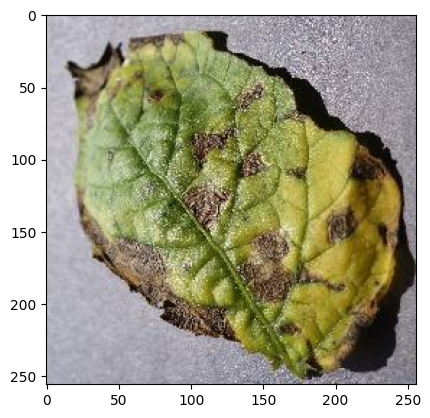

In [20]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

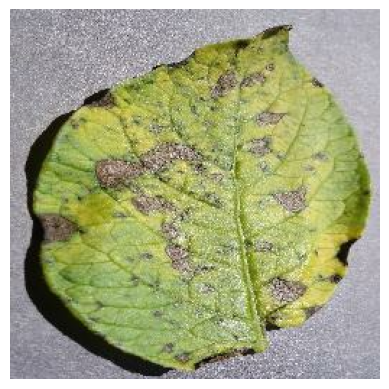

In [21]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off") #remove axis

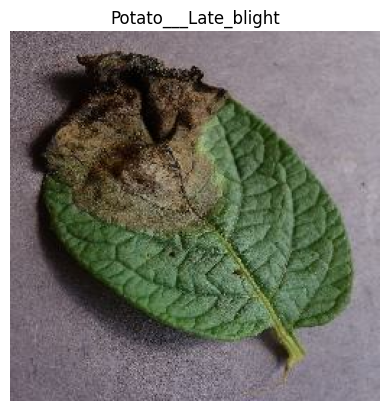

In [22]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    #plt.title(label_batch[0])
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

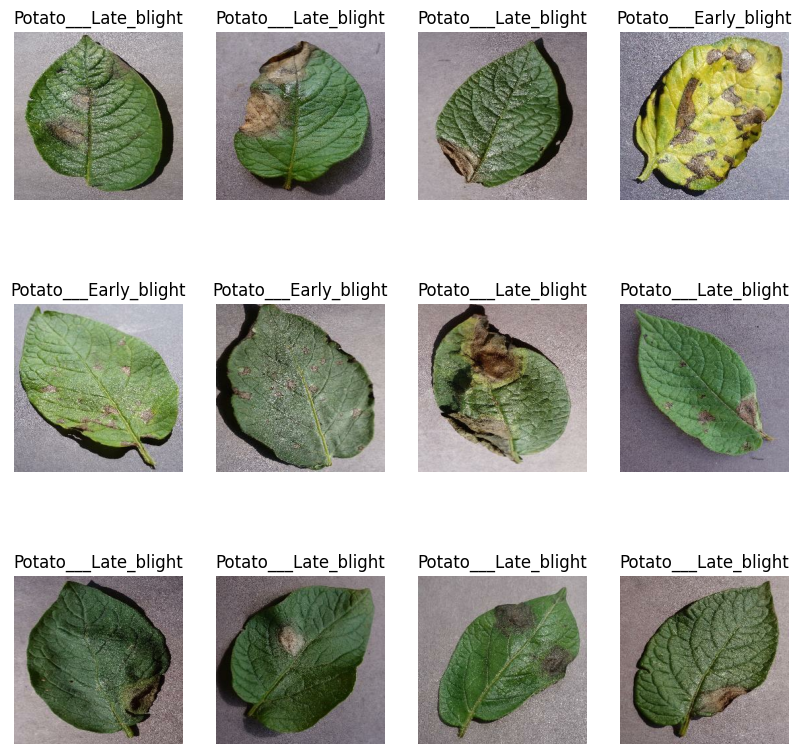

In [23]:
#display deveral images
plt.figure(figsize=(10,10)) #to increase area of each image to avoid overlapping
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [24]:
len(dataset)

68

In [25]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [26]:
train_size=0.8
#dataset.take(10) #takes first 10 samples
len(dataset)*train_size

54.400000000000006

In [27]:
train_ds=dataset.take(54) #takes first 54 samples #arr[:54]
len(train_ds)

54

In [28]:
test_ds=dataset.skip(54) #54 onwards arr[54:]
len(test_ds) #temporary test_ds with both val_ds and test_ds

14

In [29]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [30]:
val_ds=dataset.take(6) #takes first 54 samples #arr[:54]
len(val_ds)

6

In [31]:
test_ds=test_ds.skip(6) #54 onwards arr[54:]
len(test_ds)

8

In [32]:
#Actual function to split

def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
#     test_size=int(ds_size*test_split)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [33]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [34]:
len(train_ds)

54

In [35]:
len(val_ds)

6

In [36]:
len(test_ds)

8

In [37]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [38]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [39]:
#For new tensorflow versions

# resize_and_rescale = tf.keras.Sequential([
#     tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#     tf.keras.layers.Rescaling(1.0 / 255)
# ])

In [40]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Convolutional Neural Network

In [41]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

IMAGE_SIZE

256

In [42]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    # first convolution layer
    layers.Conv2D(32, (3, 3), activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
 
    # second convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # third convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # fourth convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # fifth convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # sixth convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
 
    # fully connected classification
    # single vector
    layers.Flatten(),
        
    # hidden layer and output layer
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

In [43]:
model.build(input_shape=input_shape)

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [45]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [46]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 97s 2s/step - loss: 0.9190 - accuracy: 0.4844 - val_loss: 0.8702 - val_accuracy: 0.4688
Epoch 2/50
54/54 [==============================] - 92s 2s/step - loss: 0.7400 - accuracy: 0.6279 - val_loss: 0.5587 - val_accuracy: 0.7292
Epoch 3/50
54/54 [==============================] - 99s 2s/step - loss: 0.5452 - accuracy: 0.7674 - val_loss: 0.3972 - val_accuracy: 0.8281
Epoch 4/50
54/54 [==============================] - 88s 2s/step - loss: 0.4634 - accuracy: 0.8044 - val_loss: 0.3077 - val_accuracy: 0.8698
Epoch 5/50
54/54 [==============================] - 81s 2s/step - loss: 0.3514 - accuracy: 0.8466 - val_loss: 0.4345 - val_accuracy: 0.8125
Epoch 6/50
54/54 [==============================] - 82s 2s/step - loss: 0.3452 - accuracy: 0.8646 - val_loss: 0.3107 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 82s 2s/step - loss: 0.2717 - accuracy: 0.9062 - val_loss: 0.4433 - val_accuracy: 0.7917
Epoch 8/50
54/54 [==

In [47]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 4s 327ms/step - loss: 0.1060 - accuracy: 0.9688


In [48]:
scores

[0.10603680461645126, 0.96875]

In [49]:
history

In [50]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
history.history['accuracy']

[0.484375,
 0.6278935074806213,
 0.7673611044883728,
 0.8043981194496155,
 0.8466435074806213,
 0.8645833134651184,
 0.90625,
 0.9172453880310059,
 0.9172453880310059,
 0.9479166865348816,
 0.9392361044883728,
 0.9265046119689941,
 0.9600694179534912,
 0.9681712985038757,
 0.9710648059844971,
 0.9745370149612427,
 0.9513888955116272,
 0.9762731194496155,
 0.9780092835426331,
 0.9612268805503845,
 0.9537037014961243,
 0.9797453880310059,
 0.9832175970077515,
 0.9739583134651184,
 0.9675925970077515,
 0.9861111044883728,
 0.9878472089767456,
 0.9849537014961243,
 0.9884259104728699,
 0.9814814925193787,
 0.9924768805503845,
 0.9780092835426331,
 0.9785879850387573,
 0.9918981194496155,
 0.9826388955116272,
 0.9895833134651184,
 0.9890046119689941,
 0.9965277910232544,
 0.9953703880310059,
 0.9583333134651184,
 0.9832175970077515,
 0.9890046119689941,
 0.9855324029922485,
 0.9837962985038757,
 0.9901620149612427,
 0.9866898059844971,
 0.9785879850387573,
 0.9884259104728699,
 0.9942129850

In [53]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

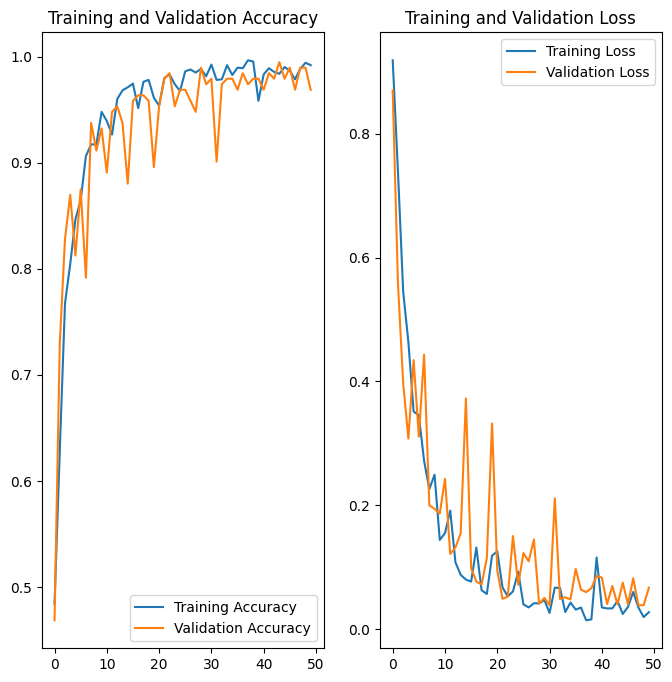

In [54]:
plt.figure(figsize=(8,8))

#Training and Validation Accuracy
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [58]:
#Display first image as numpy array
for images_batch, labels_batch in test_ds.take(1): #take only te 1st batch
    #images_batch elements are tensors. to turn them into numpy we can use .numpy()
    first_image=images_batch[0].numpy().astype('uint8')
#print(images_batch[0])-->gives tensor
#print(images_batch[0].numpy())-->gives numpy
#print(images_batch[0].numpy().astype('uint8'))-->gives 3 dimentional rgb array
#plt.imshow(images_batch[0].numpy().astype('uint8'))-->gives image

first_image

array([[[188, 183, 180],
        [193, 188, 185],
        [197, 192, 189],
        ...,
        [199, 194, 198],
        [199, 194, 198],
        [199, 194, 198]],

       [[191, 186, 183],
        [195, 190, 187],
        [199, 194, 191],
        ...,
        [199, 194, 198],
        [200, 195, 199],
        [201, 196, 200]],

       [[196, 191, 188],
        [197, 192, 189],
        [198, 193, 190],
        ...,
        [200, 195, 199],
        [202, 197, 201],
        [203, 198, 202]],

       ...,

       [[140, 135, 132],
        [128, 123, 120],
        [131, 125, 125],
        ...,
        [151, 142, 145],
        [157, 148, 151],
        [152, 143, 146]],

       [[137, 133, 132],
        [134, 130, 129],
        [140, 136, 137],
        ...,
        [151, 142, 145],
        [156, 147, 150],
        [146, 137, 140]],

       [[116, 112, 111],
        [129, 125, 124],
        [143, 139, 140],
        ...,
        [152, 143, 146],
        [162, 153, 156],
        [155, 146, 149]]

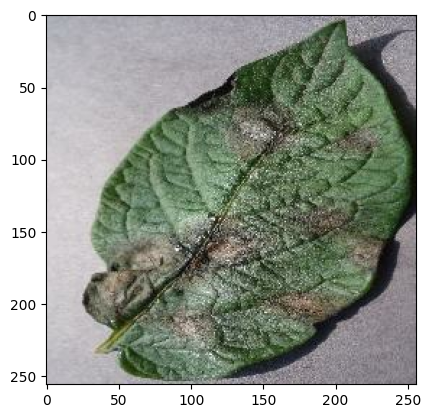

In [59]:
#Display first image
for images_batch, labels_batch in test_ds.take(1): #take only te 1st batch
    #images_batch elements are tensors. to turn them into numpy we can use .numpy()
    plt.imshow(images_batch[0].numpy().astype('uint8'))


first image to predict
first image's actual label :  1
first image's class type :  Potato___Late_blight
1/1 [==============================] - 1s 767ms/step
[4.6292567e-03 9.9537069e-01 1.9022420e-10]
Index of the class with the highest value :  1
Class name of the class with the highest value :  Potato___Late_blight


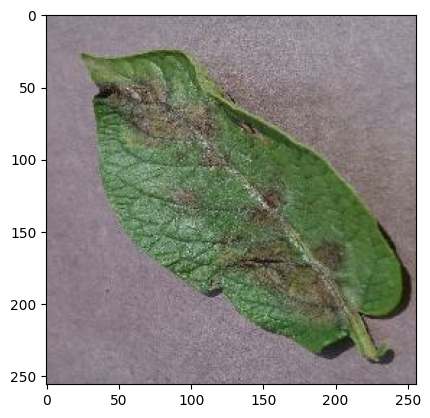

In [60]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1): #take only te 1st batch
    #images_batch elements are tensors. to turn them into numpy we can use .numpy()
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("first image's actual label : ",first_label)
    print("first image's class type : ",class_names[first_label])

    batch_prediction=model.predict(images_batch) #For the whole batch
    print(batch_prediction[0]) #Prediction only for the first image
    #here you will see 3 values. The highest value is the correct class of the leaf
    
    print("Index of the class with the highest value : ",np.argmax(batch_prediction[0]))
    print("Class name of the class with the highest value : ",class_names[np.argmax(batch_prediction[0])])

In [61]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

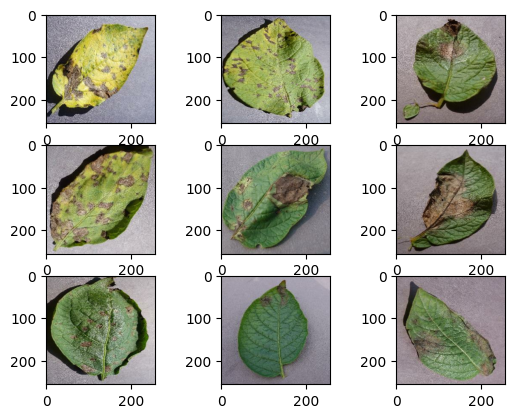

In [62]:
for images, labels in test_ds.take(1):
    for i in range(9):
#         plt.imshow(images[i].numpy().astype("uint8")) #Only shows one image
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

1/1 [==============================] - 0s 42ms/step


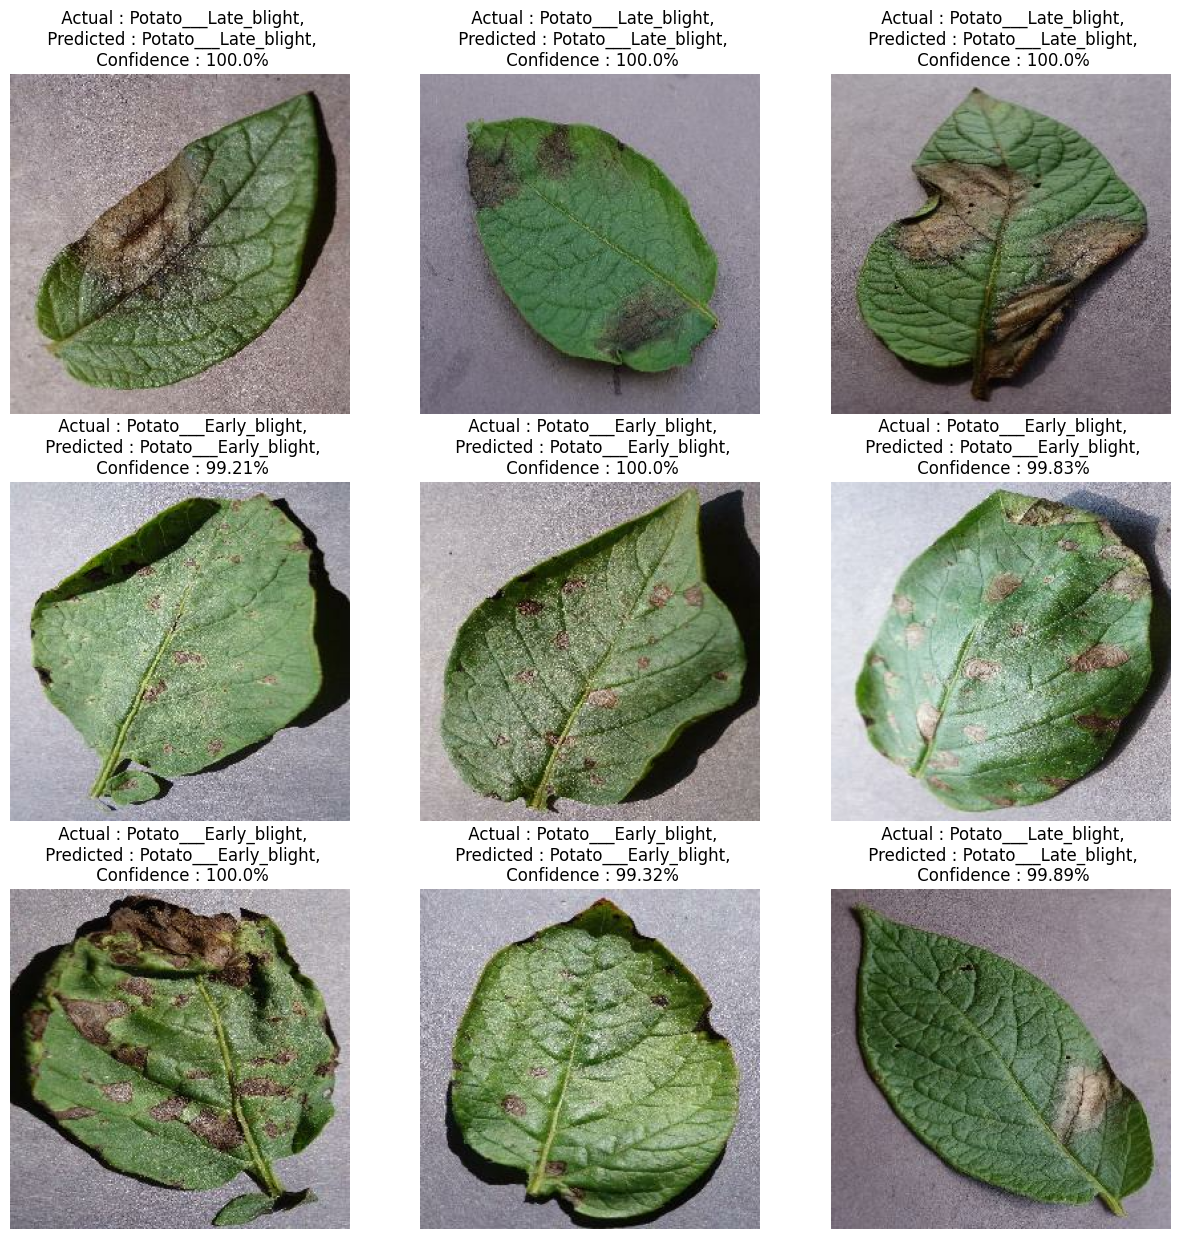

In [63]:
plt.figure(figsize=(15,15)) #to make image size bigger
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f" Actual : {actual_class},\n Predicted : {predicted_class},\n Confidence : {confidence}%")
        
        plt.axis("off")

In [68]:
model.save(f'../models/my_model.h5')

In [69]:
model.save(f'../saved_models/my_model.h5')

In [71]:
model.save(f'../saved_models/my_model.keras')

In [70]:
model.save(f'../saved_models/my_model2')

INFO:tensorflow:Assets written to: ../saved_models/my_model2\assets


INFO:tensorflow:Assets written to: ../saved_models/my_model2\assets


In [73]:
model.save('my_model.h5')

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
# import os
# model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
# model.save(f'../models/{model_version}.h5')

ValueError: invalid literal for int() with base 10: 'deleteme'

In [64]:
# import os
# model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
# model.save(f"../models/{model_version}")

In [65]:
# model.save(f"../models/{model_version}")
# model_version=1
